Theory:
$$
\newcommand{\ket}[1]{\left|#1\right\rangle}
\ket{\psi}=\left(\cos\frac{\theta}{2}\ket{0}+\sin\frac{\theta}{2}\ket{1}\right)\otimes\frac{1}{\sqrt{2}}(\ket{00}+\ket{11})=$$

In [1]:
import sys
sys.path.append('../jobDataGatherer')
sys.path.append('../')
from check_QE import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
jobs=get_done_jobs(100)
jobs=[j for j in jobs if j['creationDate']>'2018-07-10T1']

In [3]:
data=filter_jobs_data(jobs)

In [4]:
data=pd.DataFrame.from_dict(data)

In [5]:
data['theta']=np.tile(np.repeat(np.linspace(0,np.pi,10),2),int(data.shape[0]/20))
data['job']=np.tile(['test','teleport'],int(data.shape[0]/2))
data['index']=np.repeat(range(int(data.shape[0]/20)),20)
data.head()

,backend_name,date,results,theta,job,index
0,ibmqx5,2018-07-10T20:43:49.702Z,"{'0000000000000000': 510, '0000000000000001': ...",0.000000,test,0
1,ibmqx5,2018-07-10T20:43:49.897Z,"{'0000000000000000': 577, '0000000000000001': ...",0.000000,teleport,0
2,ibmqx5,2018-07-10T20:43:50.020Z,"{'0000000000000000': 834, '0000000000000001': ...",0.349066,test,0
3,ibmqx5,2018-07-10T20:43:50.141Z,"{'0000000000000000': 327, '0000000000000001': ...",0.349066,teleport,0
4,ibmqx5,2018-07-10T20:43:50.304Z,"{'0000000000000000': 749, '0000000000000001': ...",0.698132,test,0


In [6]:
results=data.results.apply(pd.Series)
results=results.fillna(0)
results.head()

,0000000000000000,0000000000000001,0000000000000010,0000000000000011,0000000000000100,0000000000000101,0000000000000110,0000000000000111,1000000000000000,1000000000000001,1000000000000010,1000000000000011,1000000000000100,1000000000000101,1000000000000110,1000000000000111
0,510.0,19.0,4.0,0.0,9.0,0.0,0.0,0.0,471.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0
1,577.0,18.0,33.0,11.0,96.0,2.0,4.0,3.0,26.0,80.0,14.0,123.0,4.0,8.0,3.0,22.0
2,834.0,34.0,13.0,0.0,126.0,9.0,0.0,0.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,327.0,105.0,96.0,274.0,50.0,26.0,13.0,39.0,31.0,13.0,10.0,26.0,3.0,3.0,1.0,7.0
4,749.0,104.0,9.0,1.0,132.0,20.0,1.0,0.0,6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


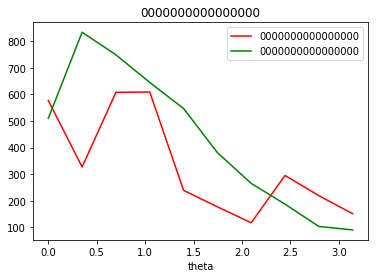

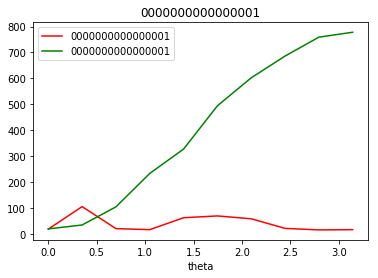

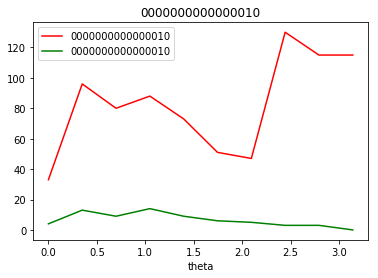

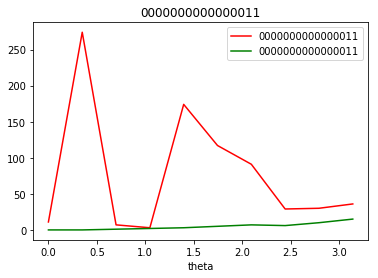

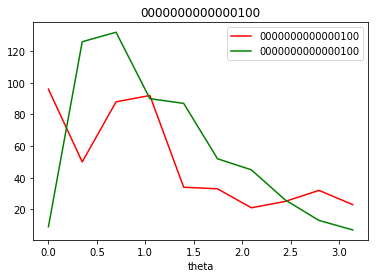

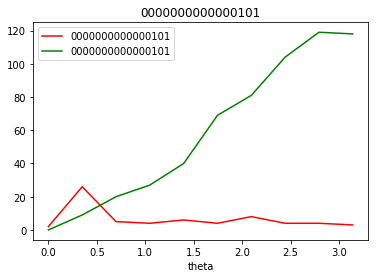

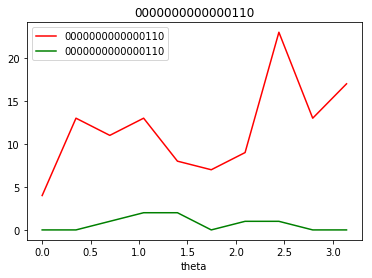

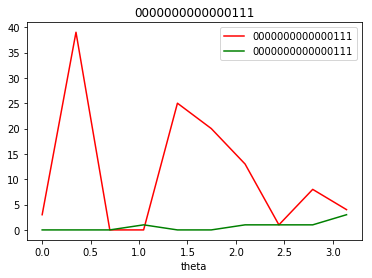

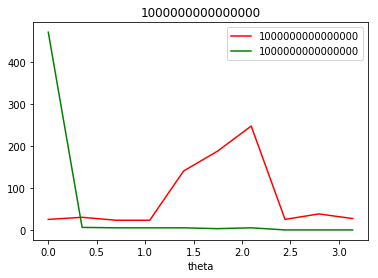

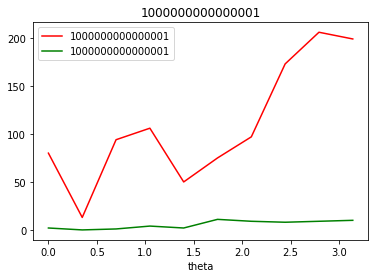

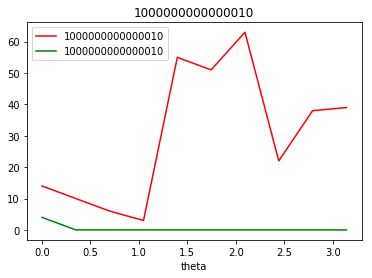

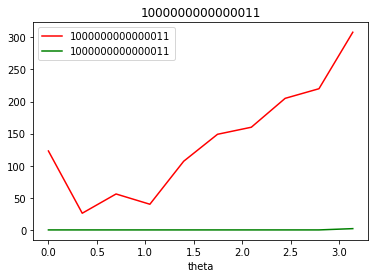

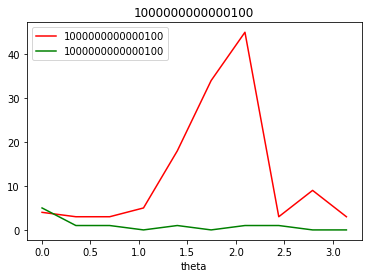

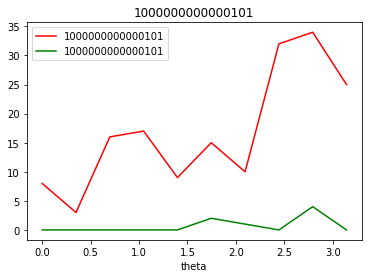

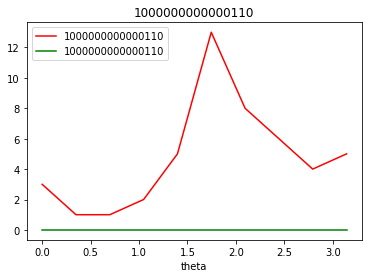

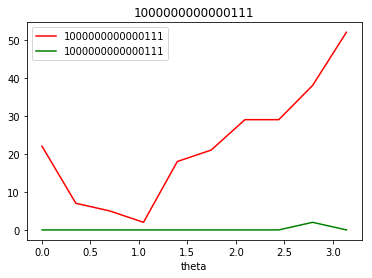

In [7]:
keys=list(results)
results['theta']=np.tile(np.repeat(np.linspace(0,np.pi,10),2),int(data.shape[0]/20))
results['job']=np.tile(['test','teleport'],int(data.shape[0]/2))
color={'test':'green','teleport':'red'}
for key in keys:
    f,a=plt.subplots()
    for k,group in results.groupby('job'):
        group.plot(x='theta',y=key,c=color[k],title=key,ax=a)
    plt.show()

ibmqx5: t000000000000xyz

z=q[0]

y=q[1]

t=q[2]

x=error

In [8]:
data['X000']=results['0000000000000000']+results['0000000000000100']
data['X001']=results['1000000000000000']+results['1000000000000100']
data['X010']=results['0000000000000010']+results['0000000000000110']
data['X011']=results['1000000000000010']+results['1000000000000110']
data['X100']=results['0000000000000001']+results['0000000000000101']
data['X101']=results['1000000000000001']+results['1000000000000101']
data['X110']=results['0000000000000011']+results['0000000000000111']
data['X111']=results['1000000000000011']+results['1000000000000111']
#X*q[0]*q[1]*q[2]

In [9]:
test_data=data.query('job=="test"')
teleport_data=data.query('job=="teleport"')
test_data['alpha']=test_data.X000+test_data.X001+test_data.X010+test_data.X011
test_data['beta']=test_data.X100+test_data.X101+test_data.X110+test_data.X111
teleport_data['alpha']=teleport_data.X000+teleport_data.X110+teleport_data.X011+teleport_data.X101
teleport_data['beta']=teleport_data.X001+teleport_data.X111+teleport_data.X100+teleport_data.X010

C:\Users\Alicja\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Alicja\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Alicja\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [10]:
agg_data=teleport_data[['backend_name','date','theta','index','alpha','beta']]
agg_data=agg_data.rename(columns={'backend_name':'backend'})
agg_data['alpha']=agg_data['alpha']/1024
agg_data['beta']=agg_data['beta']/1024
agg_data=agg_data.assign(
    alpha_test=list(test_data.alpha/1024),
    beta_test=list(test_data.beta/1024),
    alpha_theory=np.cos(agg_data.theta/2)**2,
    beta_theory=np.sin(agg_data.theta/2)**2
)
agg_data.head()

,backend,date,theta,index,alpha,beta,alpha_test,beta_test,alpha_theory,beta_theory
1,ibmqx5,2018-07-10T20:43:49.897Z,0.000000,0,0.773438,0.226562,0.979492,0.020508,1.000000,0.000000
3,ibmqx5,2018-07-10T20:43:50.141Z,0.349066,0,0.700195,0.299805,0.958008,0.041992,0.969846,0.030154
5,ibmqx5,2018-07-10T20:43:50.448Z,0.698132,0,0.800781,0.199219,0.876953,0.123047,0.883022,0.116978
7,ibmqx5,2018-07-10T20:43:50.766Z,1.047198,0,0.812500,0.187500,0.739258,0.260742,0.750000,0.250000
9,ibmqx5,2018-07-10T20:43:51.046Z,1.396263,0,0.577148,0.422852,0.636719,0.363281,0.586824,0.413176


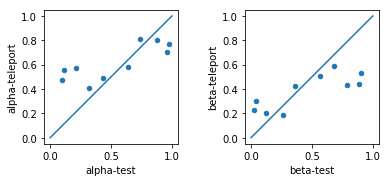

In [11]:
f, (a1,a2) = plt.subplots(1, 2, gridspec_kw={'wspace':0.5})
agg_data.plot.scatter(x='alpha_test',y='alpha',ax=a1)
agg_data.plot.scatter(x='beta_test',y='beta',ax=a2)
a1.set_ylabel('alpha-teleport')
a1.set_xlabel('alpha-test')
a2.set_ylabel('beta-teleport')
a2.set_xlabel('beta-test')
a1.plot([0,1],[0,1])
a2.plot([0,1],[0,1])
a1.set_aspect(1)
a2.set_aspect(1)
plt.show()

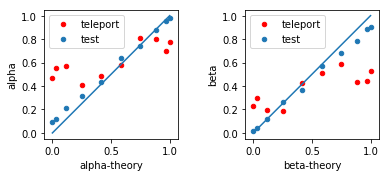

In [12]:
f, (a1,a2) = plt.subplots(1, 2, gridspec_kw={'wspace':0.5})
agg_data.plot.scatter(x='alpha_theory',y='alpha',ax=a1,label='teleport',c='r')
agg_data.plot.scatter(x='beta_theory',y='beta',ax=a2,label='teleport',c='r')
agg_data.plot.scatter(x='alpha_theory',y='alpha_test',ax=a1,label='test')
agg_data.plot.scatter(x='beta_theory',y='beta_test',ax=a2,label='test')
a1.set_ylabel('alpha')
a1.set_xlabel('alpha-theory')
a2.set_ylabel('beta')
a2.set_xlabel('beta-theory')
a1.plot([0,1],[0,1])
a2.plot([0,1],[0,1])
a1.set_aspect(1)
a2.set_aspect(1)
plt.show()

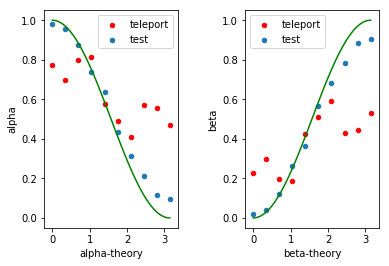

In [13]:
f, (a1,a2) = plt.subplots(1, 2, gridspec_kw={'wspace':0.5})
agg_data.plot.scatter(x='theta',y='alpha',ax=a1,label='teleport',c='r')
agg_data.plot.scatter(x='theta',y='beta',ax=a2,label='teleport',c='r')
agg_data.plot.scatter(x='theta',y='alpha_test',ax=a1,label='test')
agg_data.plot.scatter(x='theta',y='beta_test',ax=a2,label='test')
a1.plot(np.linspace(0,np.pi,100),np.cos(np.linspace(0,np.pi,100)/2)**2,label='theory',c='g')
a2.plot(np.linspace(0,np.pi,100),np.sin(np.linspace(0,np.pi,100)/2)**2,label='theory',c='g')
a1.set_ylabel('alpha')
a1.set_xlabel('alpha-theory')
a2.set_ylabel('beta')
a2.set_xlabel('beta-theory')
plt.show()